In [286]:
import numpy as np
import pandas as pd

In [287]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [288]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [289]:
x=df.drop(columns=['Outcome'])
y=df['Outcome']
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [290]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,:8]
y=df.iloc[:,8]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=44,shuffle=True)


In [291]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [292]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
svm_model = SVC()
rf_model = RandomForestClassifier()
lr_model = LogisticRegression()
knn_model = KNeighborsClassifier()

In [293]:
svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [294]:
svm_pred = svm_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
lr_pred = lr_model.predict(X_test)
knn_pred = knn_model.predict(X_test)

In [295]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
score=[]

In [296]:
s=[]
s.append('Support Vector Machine   ')
s.append(accuracy_score(y_test, svm_pred))
s.append(precision_score(y_test, svm_pred))
s.append(recall_score(y_test, svm_pred))
s.append(f1_score(y_test, svm_pred))
score.append(s)

In [297]:
s=[]
s.append('Random Forest Classifier')
s.append(accuracy_score(y_test, rf_pred))
s.append(precision_score(y_test, rf_pred))
s.append(recall_score(y_test, rf_pred))
s.append(f1_score(y_test, rf_pred))
score.append(s)

In [298]:
s=[]
s.append('Logistic Regression      ')
s.append(accuracy_score(y_test, lr_pred))
s.append(precision_score(y_test, lr_pred))
s.append(recall_score(y_test, lr_pred))
s.append(f1_score(y_test, lr_pred))
score.append(s)

In [299]:
s=[]
s.append('K-Nearest Neighbour       ')
s.append(accuracy_score(y_test, knn_pred))
s.append(precision_score(y_test, knn_pred))
s.append(recall_score(y_test, knn_pred))
s.append(f1_score(y_test, knn_pred))
score.append(s)

In [300]:
print('Model\t\t\t\tAccuracy\tPrecision\tRecall\t\tF1-score')
for s in score:
    for i in s:
        if(type(i)!=str):
            print('{:.3f}'.format(i), end='\t\t')
        else:
            print(i, end='\t')
    print()

Model				Accuracy	Precision	Recall		F1-score
Support Vector Machine   	0.779		0.855		0.522		0.648		
Random Forest Classifier	0.753		0.754		0.544		0.632		
Logistic Regression      	0.810		0.897		0.578		0.703		
K-Nearest Neighbour       	0.719		0.681		0.522		0.591		


In [301]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [302]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/150


17/17 [==============================] - 1s 10ms/step - loss: 0.6881 - accuracy: 0.5680 - val_loss: 0.6450 - val_accuracy: 0.6667
Epoch 2/150
17/17 [==============================] - 0s 4ms/step - loss: 0.6464 - accuracy: 0.6220 - val_loss: 0.6114 - val_accuracy: 0.6364
Epoch 3/150
17/17 [==============================] - 0s 3ms/step - loss: 0.6196 - accuracy: 0.6834 - val_loss: 0.5833 - val_accuracy: 0.6407
Epoch 4/150
17/17 [==============================] - 0s 3ms/step - loss: 0.6009 - accuracy: 0.6816 - val_loss: 0.5521 - val_accuracy: 0.6797
Epoch 5/150
17/17 [==============================] - 0s 3ms/step - loss: 0.5872 - accuracy: 0.7244 - val_loss: 0.5267 - val_accuracy: 0.7186
Epoch 6/150
17/17 [==============================] - 0s 4ms/step - loss: 0.5664 - accuracy: 0.7132 - val_loss: 0.5086 - val_accuracy: 0.7316
Epoch 7/150
17/17 [==============================] - 0s 3ms/step - loss: 0.5528 - accuracy: 0.7020 - val_loss: 0.4942 - val_accuracy: 0.7446
Epoch 8/150
17/17 [=====

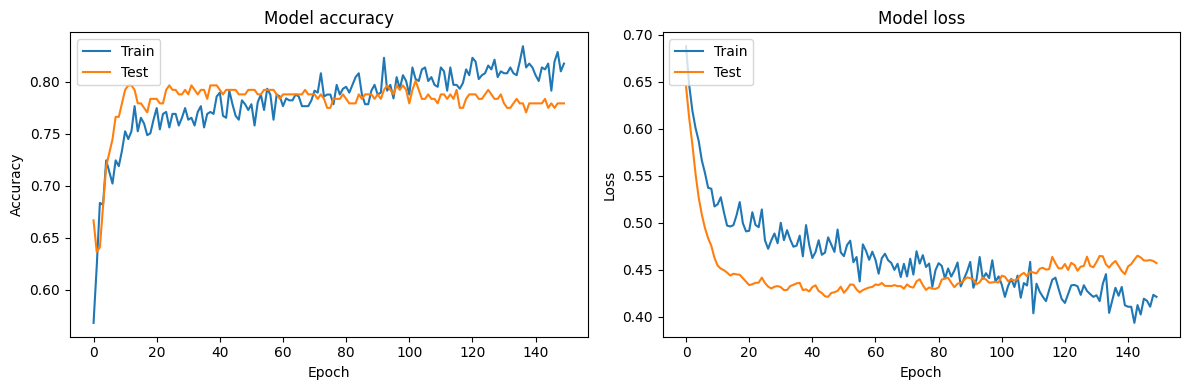

In [307]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [308]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.3)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Deep Learning Model -')
print(f"Accuracy  = {accuracy}")
print(f"Precision = {precision}")
print(f"Recall    = {recall}")
print(f"F1-Score  = {f1}")

8/8 [==============================] - 0s 805us/step
Deep Learning Model -
Accuracy  = 0.7705627705627706
Precision = 0.6728971962616822
Recall    = 0.8
F1-Score  = 0.7309644670050761


In [309]:
score = model.evaluate(np.asarray(X_test),np.asarray(y_test))

8/8 [==============================] - 0s 1ms/step - loss: 0.4570 - accuracy: 0.8008


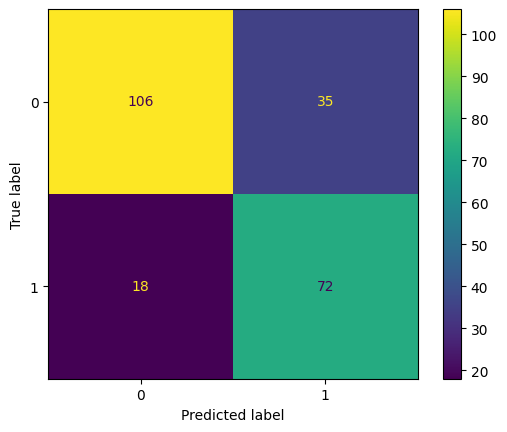

In [310]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
conf_mat = confusion_matrix(y_test, y_pred)

displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()